# Information Security Assignment # 2
# i210308 - Ahmed Kamal
# i210318 - Abdullah Rasheed

## Unzipping The Dataset

In [1]:
!unzip /content/FinalDataset.zip

Archive:  /content/FinalDataset.zip
   creating: FinalDataset/
  inflating: FinalDataset/.DS_Store  
  inflating: FinalDataset/All.csv    
  inflating: FinalDataset/All_BestFirst.csv  
  inflating: FinalDataset/All_BestFirst_test.csv  
  inflating: FinalDataset/All_Infogain.csv  
  inflating: FinalDataset/All_Infogain_test.csv  
  inflating: FinalDataset/Defacement.csv  
  inflating: FinalDataset/Defacement_BestFirst.csv  
  inflating: FinalDataset/Defacement_Infogain.csv  
  inflating: FinalDataset/Defacement_Infogain_test.csv  
  inflating: FinalDataset/Malware.csv  
  inflating: FinalDataset/Malware_BestFirst.csv  
  inflating: FinalDataset/Malware_Infogain.csv  
  inflating: FinalDataset/Malware_Infogain_test.csv  
  inflating: FinalDataset/Phishing.csv  
  inflating: FinalDataset/Phishing_BestFirst.csv  
  inflating: FinalDataset/Phishing_Infogain.csv  
  inflating: FinalDataset/Phishing_Infogain_test.csv  
  inflating: FinalDataset/Spam.csv   
  inflating: FinalDataset/Spam_BestF

## Installing Libraries

In [1]:
!pip install gensim

## All Libraries

In [1]:
# Scikit-Learn Modules
from sklearn.preprocessing import LabelEncoder

# Other Necessary Libraries
import pandas as pd

## All Declarations

In [2]:
# Define a list of file paths and corresponding types
file_paths = [
    ("FinalDataset/URL/Benign_list_big_final.csv", "benign"),
    ("FinalDataset/URL/DefacementSitesURLFiltered.csv", "defacement"),
    ("FinalDataset/URL/Malware_dataset.csv", "malware"),
    ("FinalDataset/URL/phishing_dataset.csv", "phishing"),
    ("FinalDataset/URL/spam_dataset.csv", "spam")
]

## All Functions

## Main

### Data Merging

In [3]:
main = pd.read_csv("malicious_phish.csv")
main

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [4]:
# Initialize an empty list to store dataframes
dfs = []

# Iterate through the file paths and types
for file_path, url_type in file_paths:

    # Read the CSV file
    df = pd.read_csv(file_path, header=None)

    # Assign column names
    df.columns = ["url"]

    # Add a column for the URL type
    df["type"] = url_type

    # Append the dataframe to the list
    dfs.append(df)

dfs.append(main)

# Concatenate the list of dataframes into a single dataframe
merged_df = pd.concat(dfs, ignore_index=True)

# Remove duplicate rows
initial_shape = merged_df.shape
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.reset_index(drop=True)
print(f"Removed {initial_shape[0] - merged_df.shape[0]} duplicate rows.")

# Display the merged dataframe
merged_df.head(100000)

Removed 163511 duplicate rows.


,url,type
0,http://1337x.to/torrent/1048648/American-Snipe...,benign
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign
...,...,...
99995,http://www.ccent.com.au/index.php?view=article...,defacement
99996,http://www.ccent.com.au/index.php?option=com_c...,defacement
99997,http://www.ccent.com.au/index.php?option=com_m...,defacement
99998,http://www.ccent.com.au/index.php?view=article...,defacement


### Pre-processing

In [5]:
# Display missing value counts for each column
print("Missing values before cleaning:")
print(merged_df.isnull().sum())

Missing values before cleaning:
url     0
type    0
dtype: int64


In [6]:
# Initialize the encoder
le = LabelEncoder()

# Fit and transform the 'type' column
merged_df['type_encoded'] = le.fit_transform(merged_df['type'])

# Displaying The Mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {'benign': 0, 'defacement': 1, 'malware': 2, 'phishing': 3, 'spam': 4}


In [7]:
merged_df.head()

,url,type,type_encoded
0,http://1337x.to/torrent/1048648/American-Snipe...,benign,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,benign,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,benign,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,benign,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,benign,0


### Balancing The Dataset

In [8]:
merged_df['type'].value_counts()

,count
type,
benign,428080
defacement,95308
phishing,94092
malware,23645
spam,11921


In [9]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Create a dummy feature from row indices (needed because the resampling algorithms require numeric data)
X_dummy = np.arange(len(merged_df)).reshape(-1, 1)
y = merged_df['type_encoded']

# Check original class distribution
original_counts = pd.Series(y).value_counts()
print("Original class distribution:\n", original_counts)

# Define target threshold for balancing
target_samples = 30000

# Step 1: Undersampling Majority Classes
# For classes with more than the target, we reduce their count; others remain unchanged.
undersample_strategy = {cls: min(count, target_samples) for cls, count in original_counts.to_dict().items()}
print("Undersampling strategy:", undersample_strategy)

rus = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)
X_under, y_under = rus.fit_resample(X_dummy, y)
undersampled_counts = pd.Series(y_under).value_counts()
print("\nDistribution after undersampling:\n", undersampled_counts)

# Step 2: Oversampling Minority Classes using RandomOverSampler
# Here, we simply duplicate rows for classes that have fewer than target_samples.
over_strategy = {cls: target_samples for cls, count in undersampled_counts.items() if count < target_samples}
print("Oversampling strategy:", over_strategy)

over_sampler = RandomOverSampler(sampling_strategy=over_strategy, random_state=42)
X_resampled, y_resampled = over_sampler.fit_resample(X_under, y_under)
final_counts = pd.Series(y_resampled).value_counts()
print("\nFinal distribution after hybrid sampling (under+over):\n", final_counts)

# Step 3: Create the balanced DataFrame
# Retrieve the original indices from the dummy variable (flatten X_resampled)
balanced_indices = X_resampled.flatten()
balanced_df = merged_df.iloc[balanced_indices].reset_index(drop=True)

print("\nBalanced DataFrame shape:", balanced_df.shape)

balanced_df.head()

Original class distribution:
 type_encoded
0    428080
1     95308
3     94092
2     23645
4     11921
Name: count, dtype: int64
Undersampling strategy: {0: 30000, 1: 30000, 3: 30000, 2: 23645, 4: 11921}

Distribution after undersampling:
 type_encoded
0    30000
1    30000
3    30000
2    23645
4    11921
Name: count, dtype: int64
Oversampling strategy: {2: 30000, 4: 30000}

Final distribution after hybrid sampling (under+over):
 type_encoded
0    30000
1    30000
2    30000
3    30000
4    30000
Name: count, dtype: int64

Balanced DataFrame shape: (150000, 3)


,url,type,type_encoded
0,opencongress.org/wiki/Emanuel_Cleaver,benign,0
1,spoke.com/info/p6hALmS/StephenBrauer,benign,0
2,en.wikipedia.org/wiki/List_of_Rangers_F.C._pla...,benign,0
3,skymem.com/document.aspx?name=email-2010-12-21...,benign,0
4,nytimes.com/2009/02/13/arts/design/13gall.html,benign,0


### Exploratory Data Analysis (EDA)

#### EDA On Original Dataset

Dataset Summary:
                                    url    type   type_encoded
count                            653046  653046  653046.000000
unique                           653040       5            NaN
top     routesinternational.com/air.htm  benign            NaN
freq                                  2  428080            NaN
mean                                NaN     NaN       0.723621
std                                 NaN     NaN       1.164454
min                                 NaN     NaN       0.000000
25%                                 NaN     NaN       0.000000
50%                                 NaN     NaN       0.000000
75%                                 NaN     NaN       1.000000
max                                 NaN     NaN       4.000000

Class Distribution:
type
benign        428080
defacement     95308
phishing       94092
malware        23645
spam           11921
Name: count, dtype: int64


<ipython-input-18-0bec673418fa>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


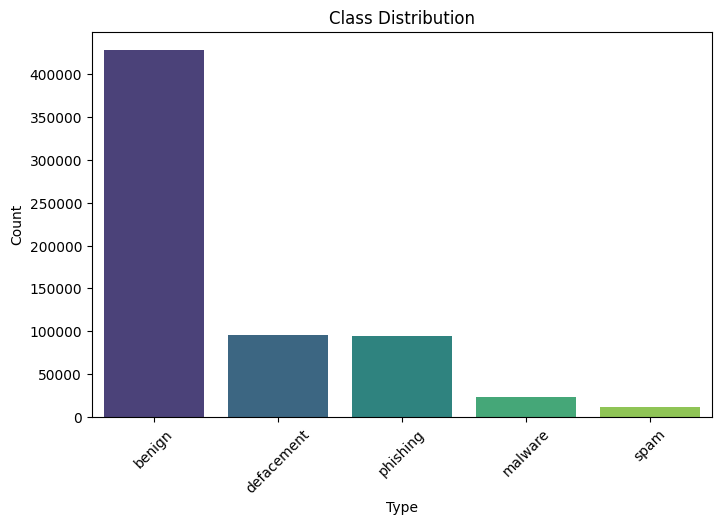

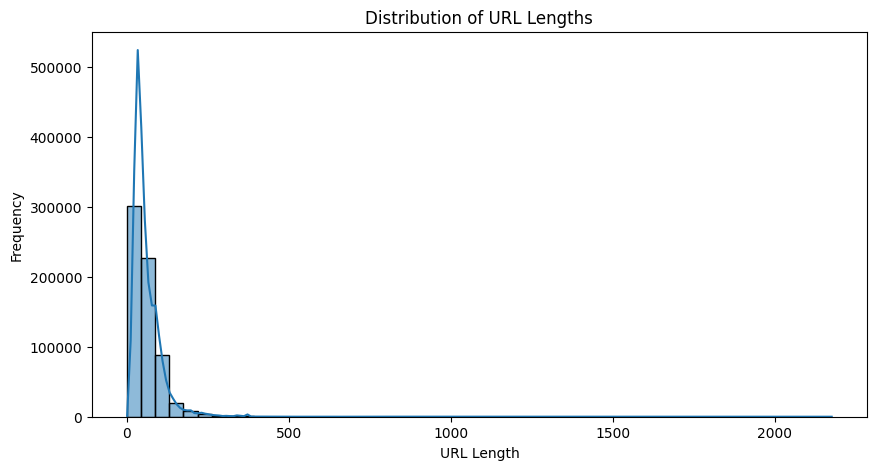


Sample URL Tokens:
                                                 url  \
0  http://1337x.to/torrent/1048648/American-Snipe...   
1  http://1337x.to/torrent/1110018/Blackhat-2015-...   
2  http://1337x.to/torrent/1122940/Blackhat-2015-...   
3  http://1337x.to/torrent/1124395/Fast-and-Furio...   
4  http://1337x.to/torrent/1145504/Avengers-Age-o...   

                                          url_tokens  
0  [1337x, to, torrent, 1048648, American-Sniper-...  
1  [1337x, to, torrent, 1110018, Blackhat-2015-RU...  
2  [1337x, to, torrent, 1122940, Blackhat-2015-x2...  
3  [1337x, to, torrent, 1124395, Fast-and-Furious...  
4  [1337x, to, torrent, 1145504, Avengers-Age-of-...  

Average URL Length by Class:
type
phishing       45.852889
malware        46.610277
benign         57.675773
defacement     86.128405
spam          127.148477
Name: url_length, dtype: float64


<ipython-input-18-0bec673418fa>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_length_by_class.index, y=avg_length_by_class.values, palette='magma')


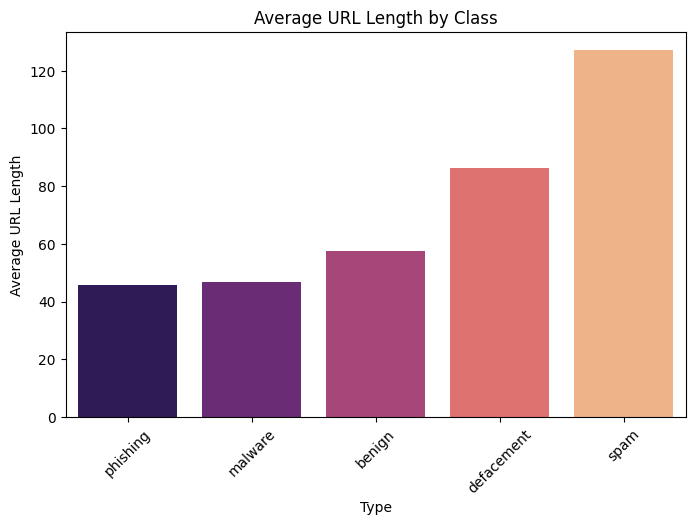


Top tokens for benign:
[('com', 20628), ('wiki', 16151), ('en.wikipedia.org', 12670), ('2011', 9382), ('watch', 9039), ('youtube.com', 8617), ('facebook.com', 7735), ('news', 7038), ('people', 5640), ('net', 5611)]

Top tokens for defacement:
[('www', 66318), ('index.php', 49013), ('com', 39122), ('de', 11698), ('index.html', 7540), ('nl', 6659), ('component', 5753), ('br', 5004), ('org', 4676), ('it', 4436)]

Top tokens for malware:
[('com', 5811), ('Mozi.m', 4100), ('uploads', 2944), ('jp', 2896), ('mixh', 2881), ('mitsui-jyuku', 2879), ('bins', 1582), ('apbfiber', 1147), ('openme', 1146), ('raw', 1002)]

Top tokens for phishing:
[('com', 15759), ('www', 6400), ('html', 3468), ('tools.ietf.org', 3190), ('index.html', 2269), ('co', 1705), ('net', 1652), ('wp-content', 1564), ('uk', 1319), ('www.angelfire.com', 1295)]

Top tokens for spam:
[('uk', 11887), ('co', 8794), ('archive', 3123), ('ac', 2402), ('amazon', 1157), ('aol', 1063), ('main.php', 775), ('search', 679), ('adservers', 6

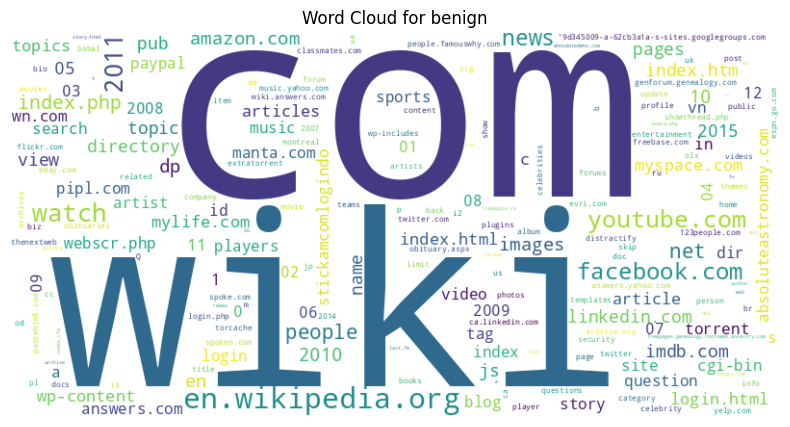

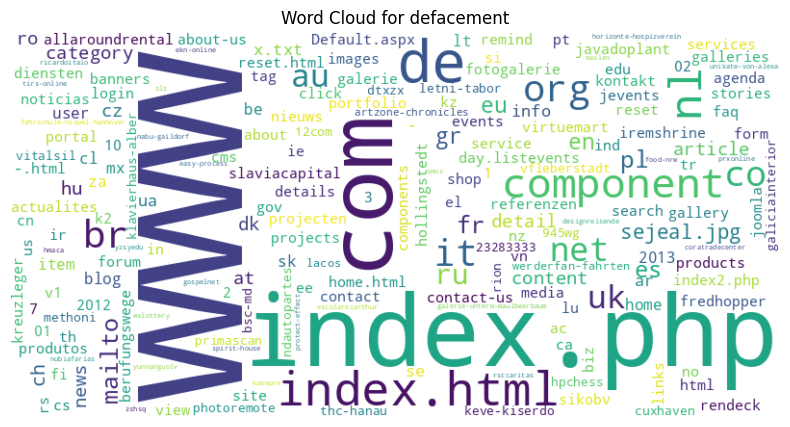

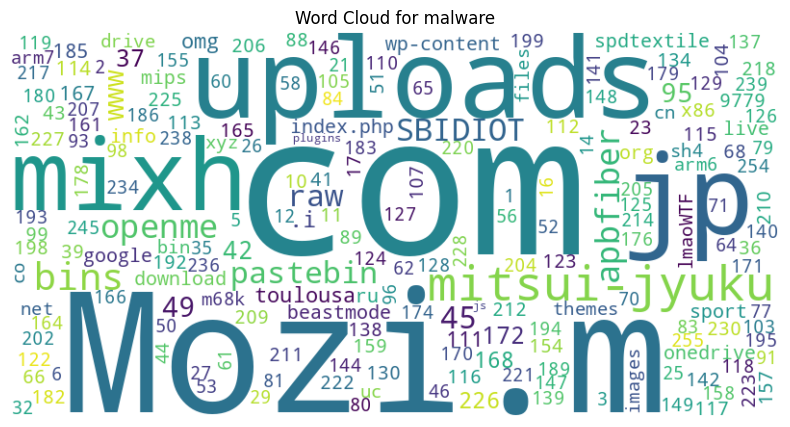

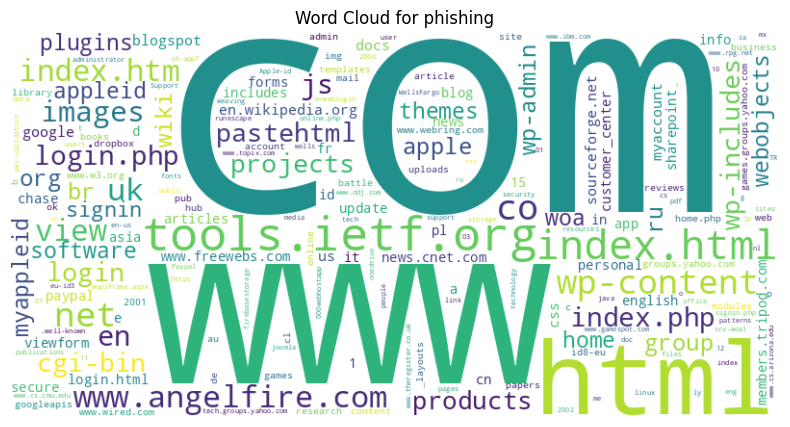

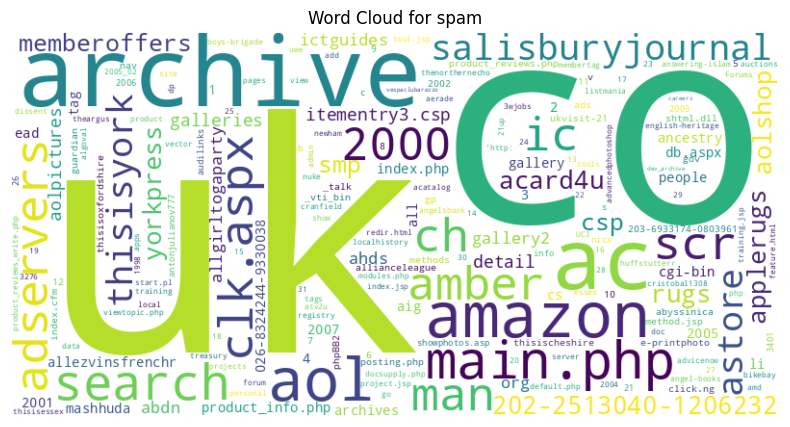

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from urllib.parse import urlparse

# 1. Descriptive Statistics
print("Dataset Summary:")
print(merged_df.describe(include='all'))

# Count of each class
class_counts = merged_df['type'].value_counts()
print("\nClass Distribution:")
print(class_counts)

# Visualize the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 2. Analyze URL Lengths
# Add a new column with the length of each URL
merged_df['url_length'] = merged_df['url'].apply(len)

# Plot distribution of URL lengths
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['url_length'], bins=50, kde=True)
plt.title("Distribution of URL Lengths")
plt.xlabel("URL Length")
plt.ylabel("Frequency")
plt.show()

# 3. Extract URL Tokens for further analysis
def extract_url_tokens(url):
    # Parse the URL to extract components
    parsed = urlparse(url)
    # Extract netloc (domain) and path tokens
    domain = parsed.netloc
    # Split domain into tokens using '.' as delimiter
    domain_tokens = domain.split('.')
    # For the path, remove leading/trailing slashes and split by '/'
    path_tokens = parsed.path.strip('/').split('/')
    # Filter out empty tokens and combine
    tokens = [token for token in domain_tokens if token] + [token for token in path_tokens if token]
    return tokens

# Apply extraction function and create a new column with tokens (as list)
merged_df['url_tokens'] = merged_df['url'].apply(extract_url_tokens)

# Display sample of tokenized URLs
print("\nSample URL Tokens:")
print(merged_df[['url', 'url_tokens']].head())

# 4. Visualize Relationships Between URL Structure and Malicious Behavior

# For instance, we can compare average URL length by class:
avg_length_by_class = merged_df.groupby('type')['url_length'].mean().sort_values()
print("\nAverage URL Length by Class:")
print(avg_length_by_class)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_length_by_class.index, y=avg_length_by_class.values, palette='magma')
plt.title("Average URL Length by Class")
plt.xlabel("Type")
plt.ylabel("Average URL Length")
plt.xticks(rotation=45)
plt.show()

# More advanced analysis: Count token frequency across classes
from collections import Counter

# Function to count tokens in a list of token lists for a given class
def token_frequency(dataframe, target_class):
    tokens = []
    for token_list in dataframe[dataframe['type'] == target_class]['url_tokens']:
        tokens.extend(token_list)
    return Counter(tokens)

# Example: Display the 10 most common tokens for each class
classes = merged_df['type'].unique()
for cls in classes:
    freq = token_frequency(merged_df, cls)
    print(f"\nTop tokens for {cls}:")
    print(freq.most_common(10))

# You can also create word clouds or other visualizations for each class.
# (Make sure to install the 'wordcloud' package if you want to use it.)
from wordcloud import WordCloud
for cls in classes:
    freq = token_frequency(merged_df, cls)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {cls}")
    plt.axis('off')
    plt.show()

DataFrame shape: (653046, 5)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653046 entries, 0 to 653045
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   url           653046 non-null  object
 1   type          653046 non-null  object
 2   type_encoded  653046 non-null  int64 
 3   url_length    653046 non-null  int64 
 4   url_tokens    653046 non-null  object
dtypes: int64(2), object(3)
memory usage: 24.9+ MB
None

Missing values per column:
url             0
type            0
type_encoded    0
url_length      0
url_tokens      0
dtype: int64
Number of duplicate rows: 0

Class distribution (type):
type
benign        428080
defacement     95308
phishing       94092
malware        23645
spam           11921
Name: count, dtype: int64

Sample engineered features:
                                                 url  url_length  url_length  \
0  http://1337x.to/torrent/1048648/American-Snipe...   

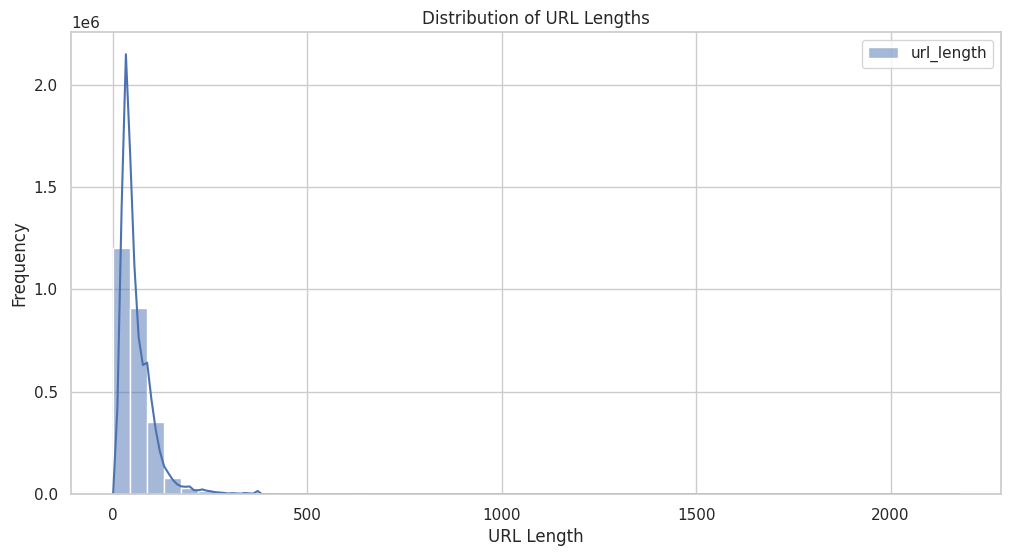

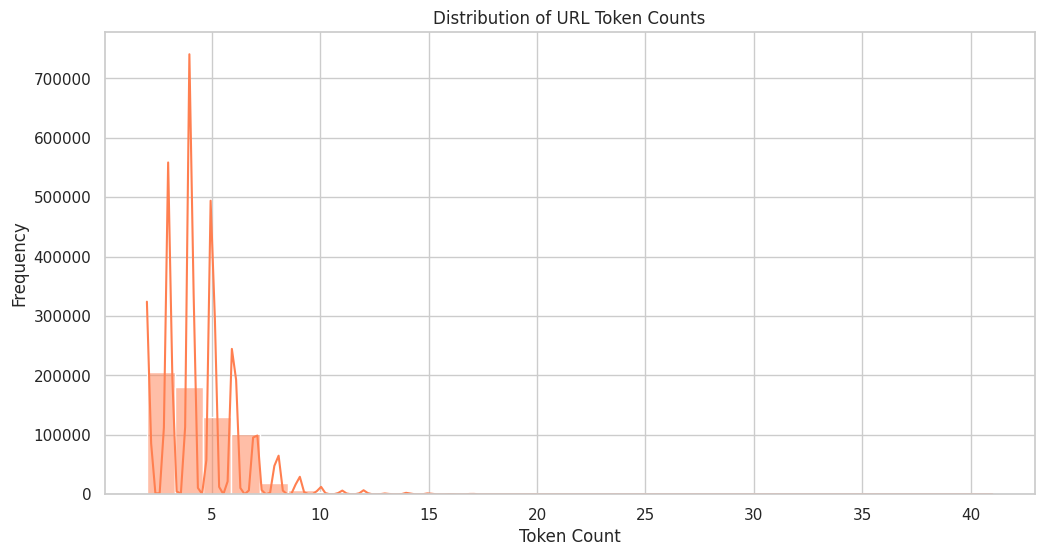

<ipython-input-22-a9b5eb4e820f>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis', order=df['type'].value_counts().index)


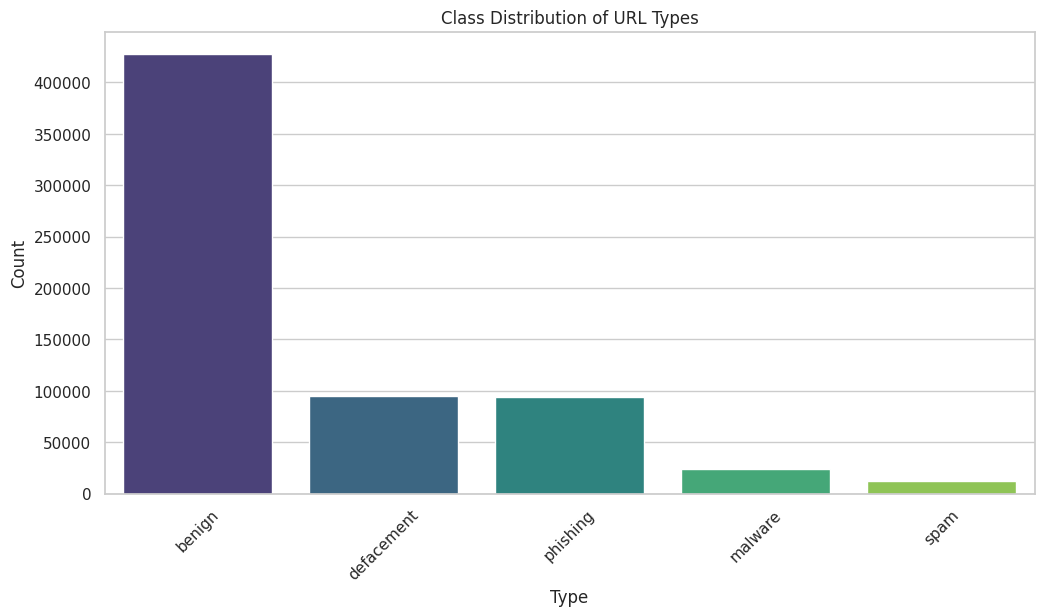


Top 10 most common tokens in URLs:
[('', 463318), ('com', 81769), ('www', 73908), ('index.php', 55885), ('uk', 17788), ('wiki', 16846), ('co', 15517), ('en.wikipedia.org', 13208), ('de', 12740), ('index.html', 12542)]


<ipython-input-22-a9b5eb4e820f>:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(tokens), palette="magma")


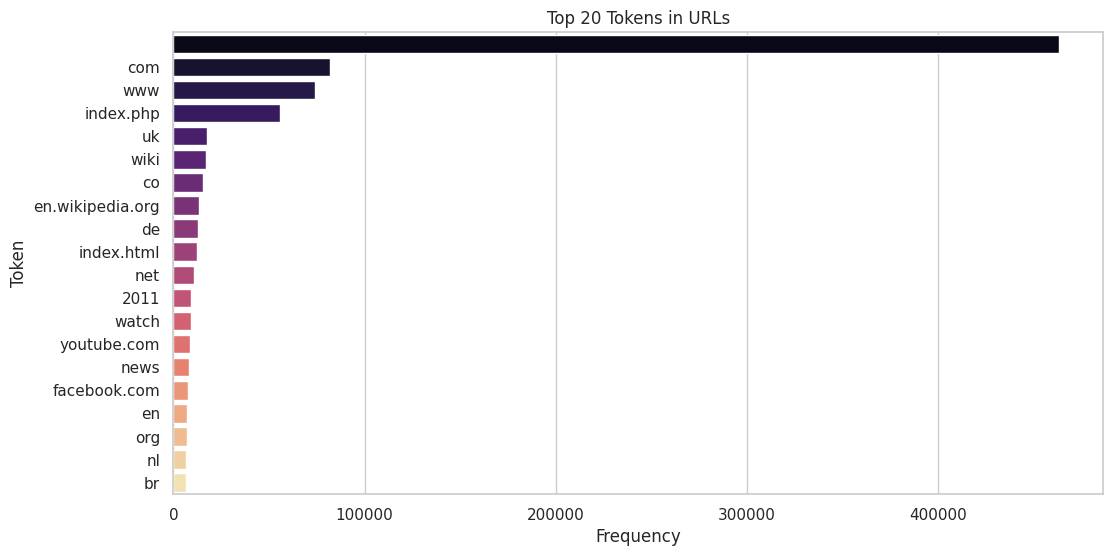

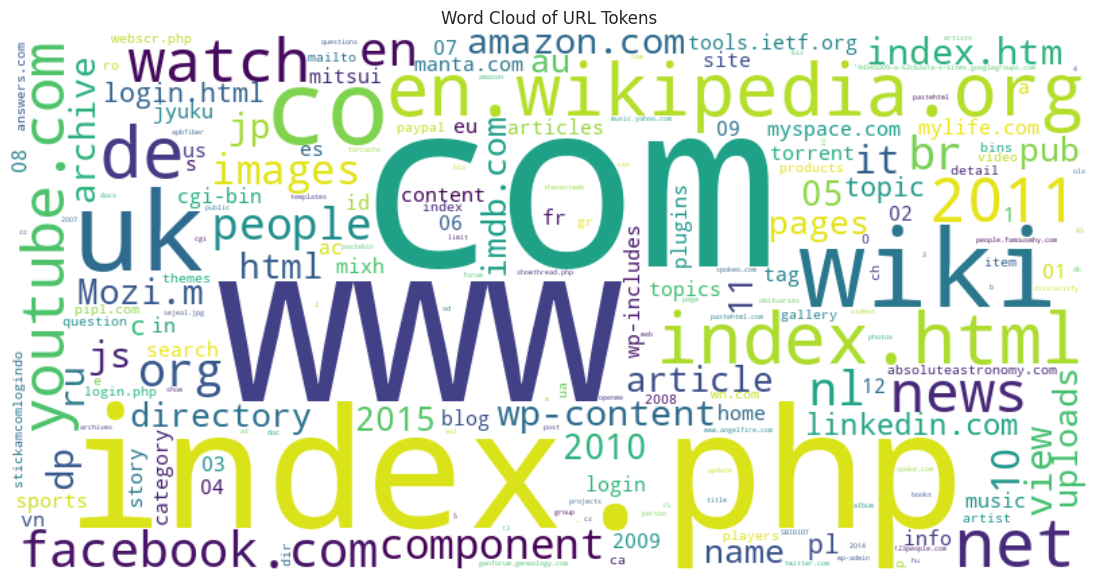

<ipython-input-22-a9b5eb4e820f>:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='url_length', palette='Set2')


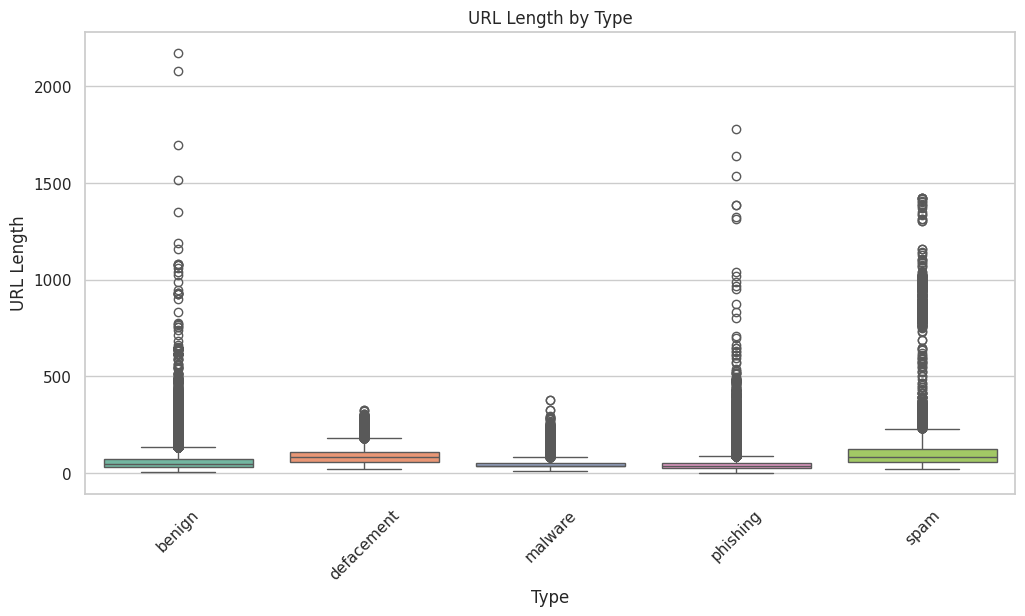

<ipython-input-22-a9b5eb4e820f>:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='token_count', palette='Set3')


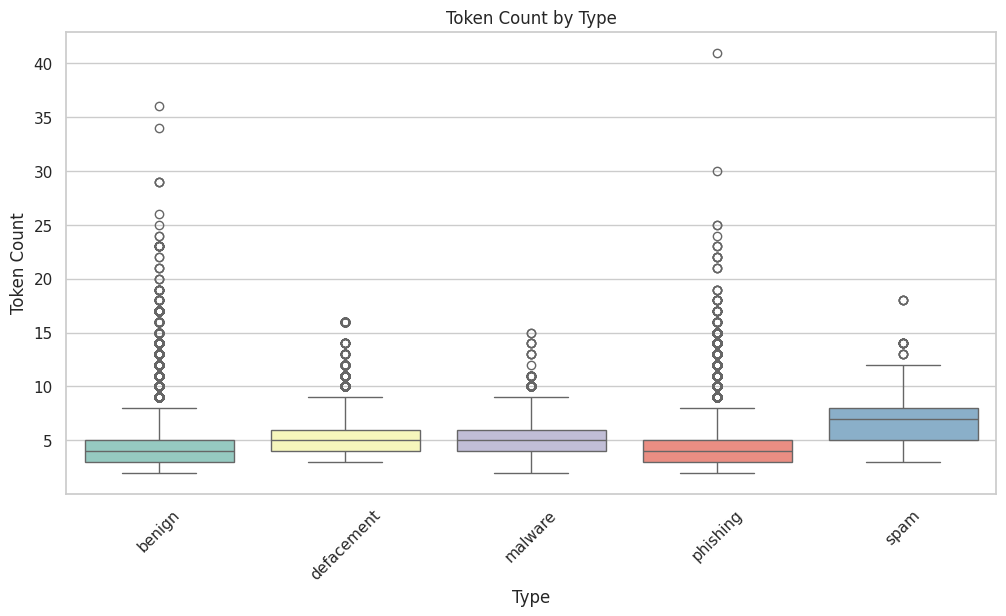

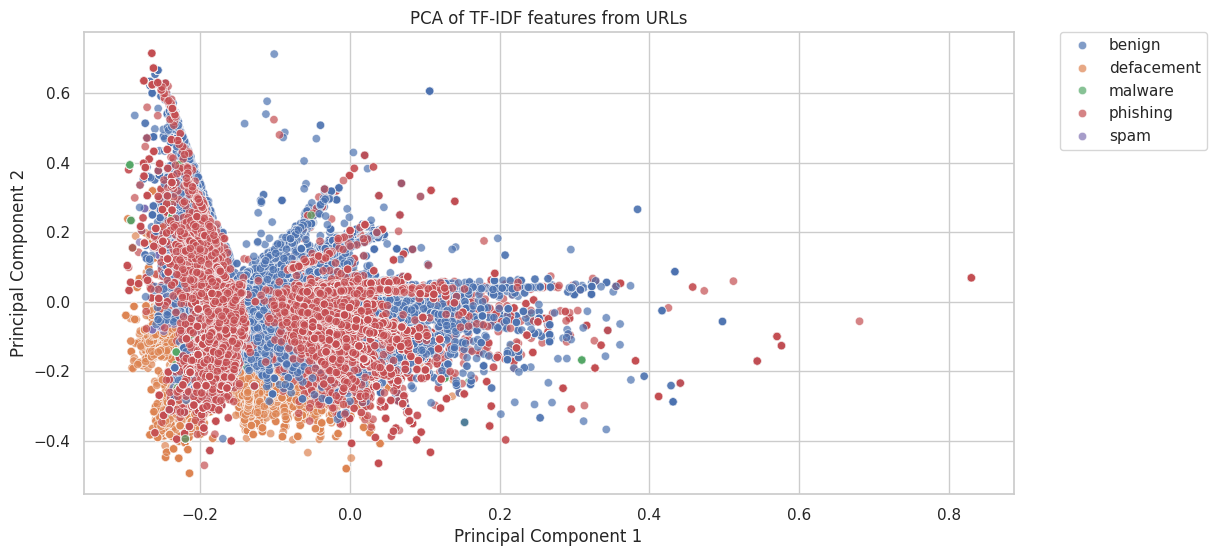

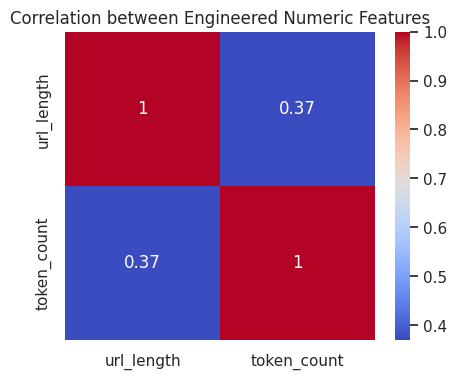


Summary Statistics:
          url_length    token_count
count  653046.000000  653046.000000
mean       60.992331       4.389303
std        50.307499       1.746971
min         1.000000       2.000000
25%        32.000000       3.000000
50%        47.000000       4.000000
75%        77.000000       5.000000
max      2175.000000      41.000000


In [22]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from urllib.parse import urlparse
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# For consistent plotting style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Assume merged_df is already loaded
print("DataFrame shape:", merged_df.shape)
print("\nDataFrame info:")
print(merged_df.info())

# Check for missing values and duplicates
print("\nMissing values per column:")
print(merged_df.isnull().sum())

# FOR DUPLICATES
# Create a copy to avoid modifying the original DataFrame
df_temp = merged_df.copy()

# Convert columns with list values into tuples
for col in df_temp.columns:
    if df_temp[col].apply(lambda x: isinstance(x, list)).any():
        df_temp[col] = df_temp[col].apply(lambda x: tuple(x) if isinstance(x, list) else x)

# Now count duplicate rows
num_duplicates = df_temp.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)
# END DUPLICATES

# Descriptive statistics for 'type_encoded' (if numeric) and counts for 'type'
print("\nClass distribution (type):")
print(merged_df['type'].value_counts())

# -----------------------------
# Feature Engineering from URL
# -----------------------------
def extract_url_features(url):
    try:
        parsed = urlparse(url)
    except Exception as e:
        parsed = None
    # Basic URL length
    url_length = len(url)
    # Domain extraction
    domain = parsed.netloc if parsed else ""
    # Tokenize domain by splitting on dots and hyphens
    domain_tokens = re.split(r'[.-]', domain)
    # Extract path tokens (ignoring empty tokens)
    path_tokens = [token for token in parsed.path.split('/') if token] if parsed else []
    # Count total tokens (domain + path)
    total_tokens = domain_tokens + path_tokens
    token_count = len(total_tokens)
    # Top-level domain (TLD)
    tld = domain.split('.')[-1] if domain and '.' in domain else ""
    return pd.Series({
        "url_length": url_length,
        "domain": domain,
        "tld": tld,
        "token_count": token_count,
        "domain_tokens": domain_tokens,
        "path_tokens": path_tokens
    })

# Apply the feature extraction to each URL
url_features = merged_df['url'].apply(extract_url_features)
# Merge new features into merged_df
df = pd.concat([merged_df, url_features], axis=1)

# Show sample of engineered features
print("\nSample engineered features:")
print(df[['url', 'url_length', 'domain', 'tld', 'token_count']].head())

# -----------------------------
# Univariate Analysis
# -----------------------------
# Distribution of URL lengths
plt.figure()
sns.histplot(df['url_length'], bins=50, kde=True, color='teal')
plt.title("Distribution of URL Lengths")
plt.xlabel("URL Length")
plt.ylabel("Frequency")
plt.show()

# Distribution of token counts in URLs
plt.figure()
sns.histplot(df['token_count'], bins=30, kde=True, color='coral')
plt.title("Distribution of URL Token Counts")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.show()

# Class (type) distribution as bar plot
plt.figure()
sns.countplot(data=df, x='type', palette='viridis', order=df['type'].value_counts().index)
plt.title("Class Distribution of URL Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# Text Token Frequency Analysis
# -----------------------------
# Combine all URL tokens into one list for overall frequency
all_tokens = []
for tokens in df['domain_tokens']:
    all_tokens.extend(tokens)
for tokens in df['path_tokens']:
    all_tokens.extend(tokens)

token_freq = Counter(all_tokens)
print("\nTop 10 most common tokens in URLs:")
print(token_freq.most_common(10))

# Plot top 20 tokens as bar plot
top_tokens = token_freq.most_common(20)
tokens, counts = zip(*top_tokens)
plt.figure()
sns.barplot(x=list(counts), y=list(tokens), palette="magma")
plt.title("Top 20 Tokens in URLs")
plt.xlabel("Frequency")
plt.ylabel("Token")
plt.show()

# Generate a word cloud from all tokens
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(token_freq)
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of URL Tokens")
plt.show()

# -----------------------------
# Bivariate Analysis
# -----------------------------

# Remove duplicated columns
df = df.loc[:, ~df.columns.duplicated()]

# Compare URL length distribution across classes
plt.figure()
sns.boxplot(data=df, x='type', y='url_length', palette='Set2')
plt.title("URL Length by Type")
plt.xlabel("Type")
plt.ylabel("URL Length")
plt.xticks(rotation=45)
plt.show()

# Compare token count distribution across classes
plt.figure()
sns.boxplot(data=df, x='type', y='token_count', palette='Set3')
plt.title("Token Count by Type")
plt.xlabel("Type")
plt.ylabel("Token Count")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# Multivariate Analysis: TF-IDF & PCA
# -----------------------------
# Using URL text for TF-IDF transformation
# Here we use the raw URL text, but you could also combine tokens if desired.
tfidf = TfidfVectorizer(max_features=1000, token_pattern=r"(?u)\b\w+\b")
X_tfidf = tfidf.fit_transform(df['url'])

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Create a DataFrame for PCA results and add the type label
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['type'] = df['type'].values

plt.figure()
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='type', palette='deep', alpha=0.7)
plt.title("PCA of TF-IDF features from URLs")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# -----------------------------
# Correlation Heatmap for Engineered Numeric Features
# -----------------------------
# Here we only have url_length and token_count; if you create more numeric features, add them here.
numeric_features = df[['url_length', 'token_count']]
plt.figure(figsize=(5,4))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Engineered Numeric Features")
plt.show()

# -----------------------------
# Summary of Findings
# -----------------------------
print("\nSummary Statistics:")
print(df[['url_length', 'token_count']].describe())

### Graphs & Plots (On Balanced Dataframe)

<ipython-input-20-2255763effe3>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_counts.index.astype(str), y=final_counts.values, palette="viridis")


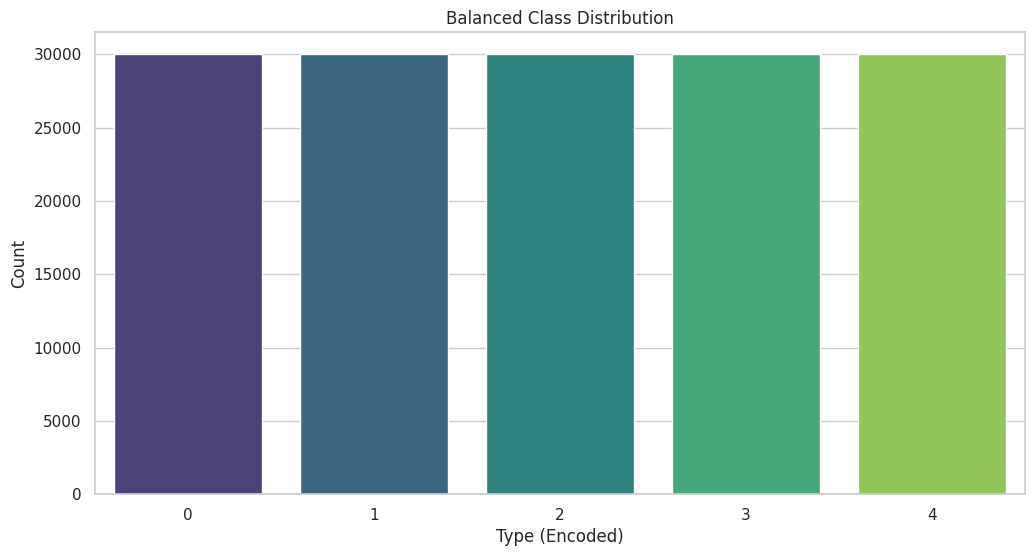

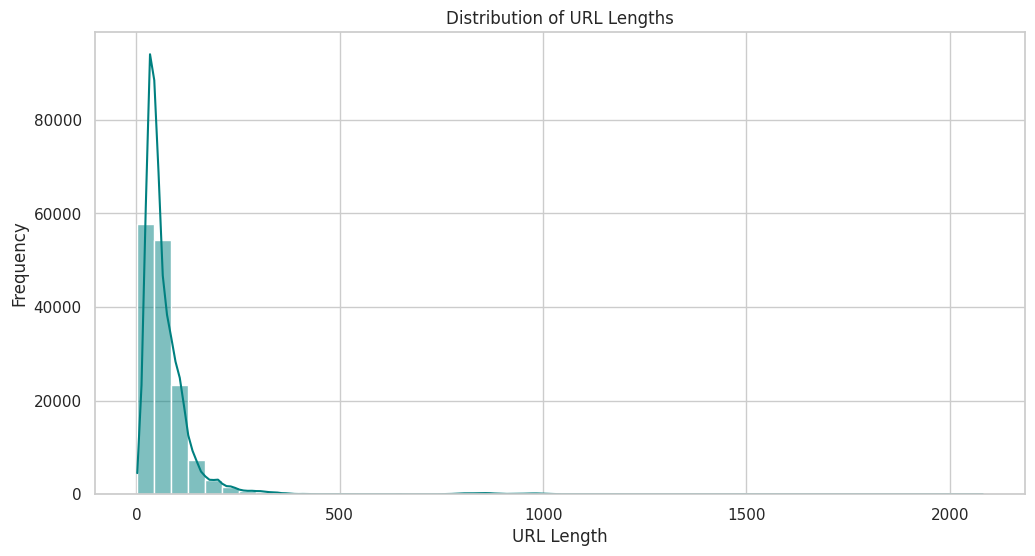

<ipython-input-20-2255763effe3>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='url_length', palette='Set2')


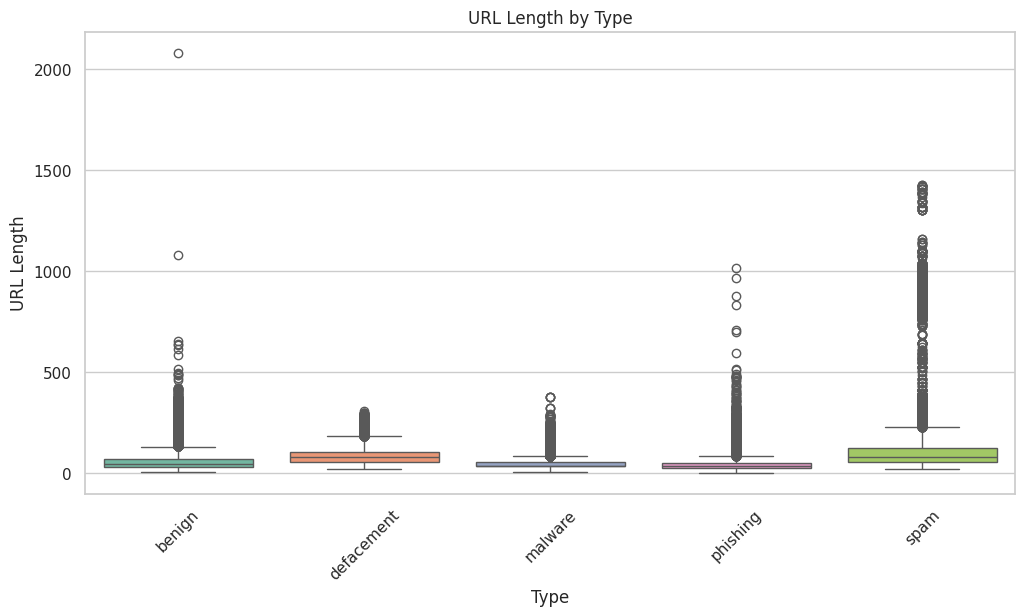

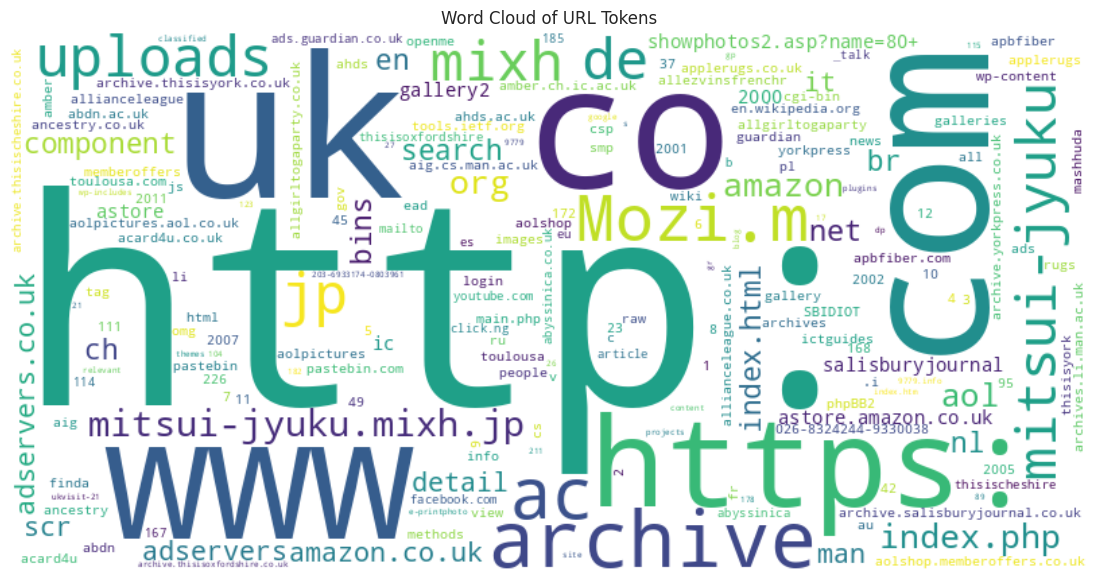

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure a consistent plotting style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# -------------------------------------------
# Graph 1: Bar Plot for Class Distribution
# -------------------------------------------
final_counts = pd.Series(y_resampled).value_counts()
plt.figure()
sns.barplot(x=final_counts.index.astype(str), y=final_counts.values, palette="viridis")
plt.title("Balanced Class Distribution")
plt.xlabel("Type (Encoded)")
plt.ylabel("Count")
plt.show()

# -------------------------------------------
# Graph 2: Histogram for URL Length Distribution
# -------------------------------------------
# Assume that you have engineered a 'url_length' column in merged_df.
# (If duplicate columns exist, ensure only one 'url_length' remains.)
df = df.loc[:, ~df.columns.duplicated()]
plt.figure()
sns.histplot(df['url_length'], bins=50, kde=True, color='teal')
plt.title("Distribution of URL Lengths")
plt.xlabel("URL Length")
plt.ylabel("Frequency")
plt.show()

# -------------------------------------------
# Graph 3: Box Plot of URL Length by Type
# -------------------------------------------
plt.figure()
sns.boxplot(data=df, x='type', y='url_length', palette='Set2')
plt.title("URL Length by Type")
plt.xlabel("Type")
plt.ylabel("URL Length")
plt.xticks(rotation=45)
plt.show()

# -------------------------------------------
# Graph 4: Word Cloud of URL Tokens
# -------------------------------------------
# Extract tokens from URL: assume you previously created 'domain_tokens' and 'path_tokens'
# Here we combine tokens into one list
all_tokens = []
df['domain_tokens'] = df['url'].apply(lambda url: url.split("/")[2].split('.') if "://" in url else [])
df['path_tokens'] = df['url'].apply(lambda url: [token for token in url.split('/') if token and "://" not in token])
df['all_tokens'] = df.apply(lambda row: row['domain_tokens'] + row['path_tokens'], axis=1)
for tokens in df['all_tokens']:
    all_tokens.extend(tokens)

from collections import Counter
token_freq = Counter(all_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(token_freq)
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of URL Tokens")
plt.show()

### Feature Extraction

In [11]:
import pandas as pd
import numpy as np
import re
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# (A) Structural Feature Extraction
# ---------------------------
def extract_structural_features(url):
    parsed = urlparse(url)
    # Feature: URL length (number of characters)
    length = len(url)
    # Feature: Count of special characters (e.g., ?, &, =)
    special_chars = len(re.findall(r"[?&=]", url))
    # Feature: Subdomain count (domain split by '.' minus main domain and TLD)
    domain = parsed.netloc
    subdomain_count = max(len(domain.split('.')) - 2, 0) if domain else 0
    # Feature: HTTPS flag (1 if HTTPS, else 0)
    is_https = 1 if parsed.scheme.lower() == 'https' else 0
    return pd.Series({
        'url_length': length,
        'special_char_count': special_chars,
        'subdomain_count': subdomain_count,
        'is_https': is_https
    })

# Apply structural feature extraction to each URL in balanced_df
balanced_df[['url_length', 'special_char_count', 'subdomain_count', 'is_https']] = balanced_df['url'].apply(extract_structural_features)

print("Sample structural features:")
print(balanced_df[['url', 'url_length', 'special_char_count', 'subdomain_count', 'is_https']].head())

# ---------------------------
# (B) NLP-Based Embeddings
# ---------------------------
# (B1) Word-level TF-IDF Embeddings
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(balanced_df['url'])
# For demonstration, we convert to DataFrame (you may keep it sparse for modeling)
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df['type_encoded'] = balanced_df['type_encoded'].values
print("\nTF-IDF (word-level) features shape:", tfidf_df.shape)

# (B2) Word2Vec Embeddings
# Tokenization: split URL on non-word characters
def tokenize_url(url):
    tokens = re.split(r'\W+', url)
    return [token for token in tokens if token]  # filter out empty tokens

balanced_df['url_tokens'] = balanced_df['url'].apply(tokenize_url)

# Train a Word2Vec model using gensim
from gensim.models import Word2Vec
w2v_model = Word2Vec(sentences=balanced_df['url_tokens'].tolist(), vector_size=50, window=3, min_count=1, workers=4, seed=42)

# Function to compute average embedding for each URL
def get_avg_w2v(tokens):
    vectors = [w2v_model.wv[token] for token in tokens if token in w2v_model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(w2v_model.vector_size)

balanced_df['w2v_embedding'] = balanced_df['url_tokens'].apply(get_avg_w2v)
# Convert embeddings (list of vectors) into a DataFrame
w2v_embedding_df = pd.DataFrame(balanced_df['w2v_embedding'].tolist(), columns=[f'w2v_{i}' for i in range(w2v_model.vector_size)])
w2v_embedding_df['type_encoded'] = balanced_df['type_encoded'].values
print("\nWord2Vec embedding DataFrame shape:", w2v_embedding_df.shape)

# (Optional) Transformer-Based Embeddings using SentenceTransformer:
# Uncomment the following code if you want to use transformer-based embeddings.
# from sentence_transformers import SentenceTransformer
# transformer_model = SentenceTransformer('all-MiniLM-L6-v2')
# balanced_df['transformer_embedding'] = balanced_df['url'].apply(lambda x: transformer_model.encode(x))
# transformer_embedding_df = pd.DataFrame(balanced_df['transformer_embedding'].tolist(),
#                                           columns=[f'trans_{i}' for i in range(transformer_model.get_sentence_embedding_dimension())])
# transformer_embedding_df['type_encoded'] = balanced_df['type_encoded'].values
# print("\nTransformer embedding DataFrame shape:", transformer_embedding_df.shape)

# ---------------------------
# (C) Sequence-Based Feature Extraction (Character-Level TF-IDF)
# ---------------------------
# # Using character-level n-grams (3 to 5 characters)
# char_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3,5))
# char_tfidf_features = char_vectorizer.fit_transform(balanced_df['url'])
# # Convert to DataFrame for demonstration (or keep sparse)
# char_tfidf_df = pd.DataFrame(char_tfidf_features.toarray(), columns=char_vectorizer.get_feature_names_out())
# char_tfidf_df['type_encoded'] = balanced_df['type_encoded'].values
# print("\nCharacter-level TF-IDF features shape:", char_tfidf_df.shape)

# Combine structural features with Word2Vec embeddings:
combined_features = pd.concat([
    balanced_df[['url', 'url_length', 'special_char_count', 'subdomain_count', 'is_https', 'type_encoded']].reset_index(drop=True),
    w2v_embedding_df.drop(columns='type_encoded').reset_index(drop=True)
], axis=1)
print("\nCombined features shape:", combined_features.shape)

combined_features.head()

Sample structural features:
                                                 url  url_length  \
0              opencongress.org/wiki/Emanuel_Cleaver          37   
1               spoke.com/info/p6hALmS/StephenBrauer          36   
2  en.wikipedia.org/wiki/List_of_Rangers_F.C._pla...          50   
3  skymem.com/document.aspx?name=email-2010-12-21...          60   
4     nytimes.com/2009/02/13/arts/design/13gall.html          46   

   special_char_count  subdomain_count  is_https  
0                   0                0         0  
1                   0                0         0  
2                   0                0         0  
3                   2                0         0  
4                   0                0         0  

TF-IDF (word-level) features shape: (150000, 148762)

Word2Vec embedding DataFrame shape: (150000, 51)

Combined features shape: (150000, 56)


,url,url_length,special_char_count,subdomain_count,is_https,type_encoded,w2v_0,w2v_1,w2v_2,w2v_3,...,w2v_40,w2v_41,w2v_42,w2v_43,w2v_44,w2v_45,w2v_46,w2v_47,w2v_48,w2v_49
0,opencongress.org/wiki/Emanuel_Cleaver,37,0,0,0,0,0.061293,-0.003017,-1.362158,-1.020715,...,0.723018,1.709747,0.860276,0.412614,0.862745,-0.686571,0.013487,-0.428918,-0.560282,-0.435397
1,spoke.com/info/p6hALmS/StephenBrauer,36,0,0,0,0,0.165052,0.227097,-0.674979,0.828499,...,1.077724,0.811252,0.586204,0.432394,0.631697,-0.643171,-0.786658,1.267193,0.244078,-0.039757
2,en.wikipedia.org/wiki/List_of_Rangers_F.C._pla...,50,0,0,0,0,-0.618977,-0.066612,-1.935277,-0.556127,...,0.676113,1.543382,1.452616,0.721293,0.348755,-1.263391,0.485676,0.351296,-0.164276,-0.606055
3,skymem.com/document.aspx?name=email-2010-12-21...,60,2,0,0,0,-0.236999,-0.609080,-1.382744,0.194466,...,1.031180,0.772539,0.862024,-0.339116,1.595540,-0.894450,-0.832617,1.388236,1.418179,-0.750565
4,nytimes.com/2009/02/13/arts/design/13gall.html,46,0,0,0,0,0.175678,-0.939539,-0.871050,-0.438119,...,0.366198,0.195205,0.841972,-0.344872,1.433414,-0.759128,-0.486837,0.893844,0.508796,-1.199899


### Machine Learning & LLM-Based Models

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

X = combined_features.drop(['type_encoded', 'url'], axis = 1)
y = combined_features['type_encoded']

# Split into training and test sets (using stratification to preserve class distribution)
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create and train the XGBoost classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_xgb, y_train_xgb)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Evaluate accuracy and print classification report
acc_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
print("XGBoost Test Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test_xgb, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:41:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Test Accuracy: 0.9351

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      6000
           1       0.96      0.98      0.97      6000
           2       0.98      0.95      0.97      6000
           3       0.85      0.85      0.85      6000
           4       1.00      1.00      1.00      6000

    accuracy                           0.94     30000
   macro avg       0.94      0.94      0.94     30000
weighted avg       0.94      0.94      0.94     30000



In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Drop the 'url' column (we don't use the raw text here)
data = combined_features.drop(columns=['url'])

# Separate features and target
X = data.drop(columns=['type_encoded']).values
y = data['type_encoded'].values

# Convert target to categorical format (one-hot encoding)
num_classes = len(np.unique(y))
y_cat = to_categorical(y, num_classes=num_classes)

# Standardize the features for better training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets (stratified to preserve class distribution)
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_scaled, y_cat, test_size=0.2, stratify=y, random_state=42)

# ---------------------------
# Build the MLP Model
# ---------------------------
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_ann.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_ann, y_train_ann, epochs=20, batch_size=128, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_ann, y_test_ann, verbose=0)

acc_ann = accuracy * 100
print("Test Accuracy: {:.2f}%".format(acc_ann))
print("Loss: {:.2f}".format(loss)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7717 - loss: 0.6028 - val_accuracy: 0.8793 - val_loss: 0.3039
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8755 - loss: 0.3173 - val_accuracy: 0.8982 - val_loss: 0.2678
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8897 - loss: 0.2825 - val_accuracy: 0.9002 - val_loss: 0.2515
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8959 - loss: 0.2657 - val_accuracy: 0.9061 - val_loss: 0.2368
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8996 - loss: 0.2539 - val_accuracy: 0.9107 - val_loss: 0.2297
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9042 - loss: 0.2438 - val_accuracy: 0.9093 - val_loss: 0.2214
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9066 - loss: 0.2361 - val_accuracy: 0.9145 - val_loss: 0.2159
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9074 - loss: 0.2317 - val_accuracy: 0

In [17]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

In [19]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
import evaluate

# ---------------------------
# Check CUDA availability and set device
# ---------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# ---------------------------
# (A) Prepare the Dataset
# ---------------------------
# Assume balanced_df exists with columns 'url' and 'type_encoded'
train_df, val_df = train_test_split(
    balanced_df[['url', 'type_encoded']],
    test_size=0.2,
    stratify=balanced_df['type_encoded'],
    random_state=42
)

train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)

# ---------------------------
# (B) Tokenization using DistilBERT Tokenizer
# ---------------------------
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    return tokenizer(examples["url"], truncation=True, padding="max_length", max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

# Rename 'type_encoded' to 'labels'
def rename_labels(example):
    example["labels"] = example["type_encoded"]
    return example

train_dataset = train_dataset.map(rename_labels)
val_dataset = val_dataset.map(rename_labels)

train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
val_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

# ---------------------------
# (C) Model Setup
# ---------------------------
num_labels = len(balanced_df['type_encoded'].unique())
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
model.to(device)  # Move the model to the GPU

accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

# ---------------------------
# (D) Training Setup with Trainer API
# ---------------------------
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",  # Ensure evaluation and save strategies match
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to=[],          # Disable wandb reporting
    fp16=True              # Enable mixed precision training for GPU
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# ---------------------------
# (E) Training and Evaluation
# ---------------------------
trainer.train()
eval_results = trainer.evaluate()
print("Evaluation results:", eval_results)

Using device: cuda


Map:   0%|          | 0/120000 [00:00<?, ? examples/s]

Map:   0%|          | 0/30000 [00:00<?, ? examples/s]

Map:   0%|          | 0/120000 [00:00<?, ? examples/s]

Map:   0%|          | 0/30000 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss


### Results Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# ---------------------------
# (A) Confusion Matrices
# ---------------------------
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# XGBoost Confusion Matrix
cm_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("XGBoost Confusion Matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("True")

# DistilBERT Confusion Matrix
cm_bert = confusion_matrix(y_test_bert, y_pred_bert)
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title("DistilBERT Confusion Matrix")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("True")

plt.tight_layout()
plt.show()

# ---------------------------
# (B) ROC Curves (Micro-Average for Multi-Class)
# ---------------------------
# Binarize the true labels for each model (assume classes are 0,1,...,n_classes-1)
classes = np.unique(y_test_xgb)  # assuming both models use the same set of classes
y_test_bin_xgb = label_binarize(y_test_xgb, classes=classes)
y_test_bin_bert = label_binarize(y_test_bert, classes=classes)

def plot_micro_average_roc(y_true_bin, y_prob, model_name):
    # Compute micro-average ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_prob.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.figure(figsize=(8, 6))
plot_micro_average_roc(y_test_bin_xgb, y_prob_xgb, "XGBoost")
plot_micro_average_roc(y_test_bin_bert, y_prob_bert, "DistilBERT")

plt.plot([0, 1], [0, 1], "k--", lw=2, label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-Average ROC Curves for Multi-Class Classification")
plt.legend(loc="lower right")
plt.show()

# ---------------------------
# (C) Additional Comparison Visualization (Optional)
# ---------------------------
acc_df = pd.DataFrame({
    "Model": ["XGBoost", "DistilBERT", "Custom-ANN"],  # add "Custom ANN" if available
    "Accuracy": [acc_xgb, acc_bert, acc_ann]       # add accuracy for ANN if available
})

plt.figure(figsize=(6, 5))
sns.barplot(x="Model", y="Accuracy", data=acc_df, palette="pastel")
plt.ylim(0, 1)
plt.title("Overall Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# ***Thank You!***